In [ ]:
a=pd.read_excel("/content/sales_data_sample.xlsx")

In [ ]:
#1.
total_sales_per_year = a.groupby('YEAR_ID')['SALES'].sum().reset_index()
print(total_sales_per_year)


   YEAR_ID       SALES
0     2003  3516979.54
1     2004  4724162.60
2     2005  1791486.71


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#2.
highest_sales_order = a.loc[a['SALES'].idxmax()]
print("Order with the highest sales amount:")
print(highest_sales_order)

Order with the highest sales amount:
ORDERNUMBER                             10407
QUANTITYORDERED                            76
PRICEEACH                               100.0
ORDERLINENUMBER                             2
SALES                                 14082.8
ORDERDATE                 2005-04-22 00:00:00
STATUS                                On Hold
QTR_ID                                      2
MONTH_ID                                    4
YEAR_ID                                  2005
PRODUCTLINE                      Vintage Cars
MSRP                                      170
PRODUCTCODE                          S18_1749
CUSTOMERNAME        The Sharp Gifts Warehouse
PHONE                              4085553659
ADDRESSLINE1                   3086 Ingle Ln.
ADDRESSLINE2                              NaN
CITY                                 San Jose
STATE                                      CA
POSTALCODE                              94217
COUNTRY                                   U

In [ ]:
#3.
average_price = a['PRICEEACH'].mean()
print(f"Average price for all orders: {average_price}")


Average price for all orders: 83.65854410201914


In [ ]:
#3.
average_price = a['SALES'].mean()
print(f"Average price for all orders: {average_price}")

Average price for all orders: 3553.889071909316


In [ ]:
#4.
def count_orders_for_product(product_code):
    product_orders = a[a['PRODUCTCODE'] == product_code]
    num_orders = len(product_orders)
    return num_orders

product_code = 'S10_1678'
num_orders = count_orders_for_product(product_code)
print(f"Number of orders for product {product_code}: {num_orders}")


Number of orders for product S10_1678: 26


In [ ]:
#5.
a['ORDERDATE'] = pd.to_datetime(a['ORDERDATE'])
a['MONTH_ID'] = a['ORDERDATE'].dt.month

total_sales_per_month = a.groupby('MONTH_ID')['SALES'].sum().reset_index()

month_with_highest_sales = total_sales_per_month.loc[total_sales_per_month['SALES'].idxmax()]

print(f"Month with the highest total sales: {month_with_highest_sales['MONTH_ID']}")



Month with the highest total sales: 11.0


In [ ]:
#6.
total_sales_per_product_line = a.groupby('PRODUCTLINE')['SALES'].sum().reset_index()
print(total_sales_per_product_line)

        PRODUCTLINE       SALES
0      Classic Cars  3919615.66
1       Motorcycles  1166388.34
2            Planes   975003.57
3             Ships   714437.13
4            Trains   226243.47
5  Trucks and Buses  1127789.84
6      Vintage Cars  1903150.84


In [ ]:
#7.
lowest_price_order = a.loc[a['PRICEEACH'].idxmin()]
print("Order with the lowest price per unit:")
print(lowest_price_order)



Order with the lowest price per unit:
ORDERNUMBER                                           10420
QUANTITYORDERED                                          45
PRICEEACH                                             26.88
ORDERLINENUMBER                                           1
SALES                                                1209.6
ORDERDATE                               2005-05-29 00:00:00
STATUS                                           In Process
QTR_ID                                                    2
MONTH_ID                                                  5
YEAR_ID                                                2005
PRODUCTLINE                                    Vintage Cars
MSRP                                                     33
PRODUCTCODE                                        S24_1937
CUSTOMERNAME                      Souveniers And Things Co.
PHONE                                       +61 2 9495 8555
ADDRESSLINE1        Monitor Money Building, 815 Pacific Hwy
AD

In [ ]:
#8.
def filter_orders_by_status(a, status):
    filtered_data = a[a['STATUS'] == status]
    return filtered_data

status = 'Shipped'
shipped_orders = filter_orders_by_status(a, status)
print("Orders with status 'Shipped':")
print(shipped_orders)


Orders with status 'Shipped':
      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2815        10315               40      55.69                5  2227.60   
2817        10337               42      97.16                5  4080.72   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2821        10397               34      62.24                1  2116.16   

      ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0    2003

In [ ]:
#9.

a['ORDERDATE'] = pd.to_datetime(a['ORDERDATE'])
a['ORDERDATE'] = a['ORDERDATE'].dt.quarter
total_sales_per_quarter =a.groupby('QUARTER')['SALES'].sum().reset_index()
print(total_sales_per_quarter)


KeyError: 'QUARTER'

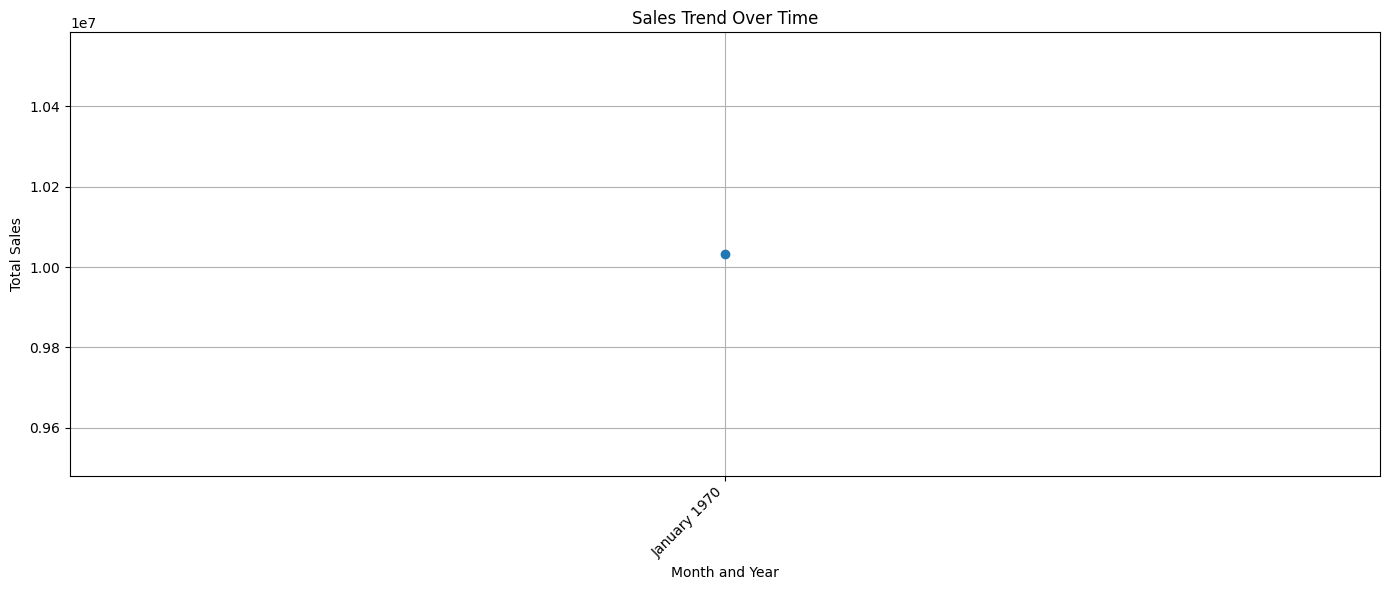

In [ ]:
#10.
import matplotlib.pyplot as plt

def plot_sales_trend(a):
    a['ORDERDATE'] = pd.to_datetime(a['ORDERDATE'])
    a['YEAR'] = a['ORDERDATE'].dt.year
    a['MONTH'] = a['ORDERDATE'].dt.month_name()

    sales_trend = a.groupby(['YEAR', 'MONTH'])['SALES'].sum().reset_index()

    plt.figure(figsize=(14, 6))
    plt.plot(sales_trend['MONTH'] + ' ' + sales_trend['YEAR'].astype(str), sales_trend['SALES'], marker='o')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Month and Year')
    plt.ylabel('Total Sales')
    plt.title('Sales Trend Over Time')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_sales_trend(a)
